In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# load the wines dataset (../data/wines.csv)
# add code here
df_iris = pd.read_csv("../data/iris.csv")



In [95]:
# do some initial exploratory data analysis

In [96]:

df_iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [97]:
df_iris.shape

(150, 6)

In [98]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [99]:
df_iris.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [100]:
# check for missing values in the dataset
df_iris.isnull().sum()


Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [101]:
# if any, impute the missing values with the mean of the column
#No missing values

In [102]:
# scale the features using StandardScaler
scaler= StandardScaler()
iris_Standard = scaler.fit_transform(df_iris.iloc[:, :-1])

df_S = pd.DataFrame(iris_Standard,columns=df_iris.columns[:-1])
df_S.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,0.000000,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.720542,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-0.860271,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,0.000000,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,0.860271,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,1.720542,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [104]:
# perform hierarchical clustering on the dataset
from scipy.cluster.hierarchy import linkage

h = linkage(df_S, method='complete', metric='euclidean')
h[:20] #Apresentar apenas as 20 primeiras rows


array([[ 80.        ,  81.        ,   0.145227  ,   2.        ],
       [128.        , 132.        ,   0.16081276,   2.        ],
       [ 30.        ,  34.        ,   0.16262183,   2.        ],
       [ 27.        ,  28.        ,   0.23823182,   2.        ],
       [ 96.        ,  99.        ,   0.24702481,   2.        ],
       [ 88.        ,  95.        ,   0.2477371 ,   2.        ],
       [  7.        ,  11.        ,   0.26550107,   2.        ],
       [ 19.        ,  21.        ,   0.26916726,   2.        ],
       [ 42.        ,  47.        ,   0.27439211,   2.        ],
       [123.        , 126.        ,   0.27514162,   2.        ],
       [  9.        ,  12.        ,   0.27514162,   2.        ],
       [  0.        ,   4.        ,   0.27605419,   2.        ],
       [  2.        ,   3.        ,   0.28482895,   2.        ],
       [127.        , 138.        ,   0.2871382 ,   2.        ],
       [ 23.        ,  26.        ,   0.3050081 ,   2.        ],
       [ 39.        ,  40

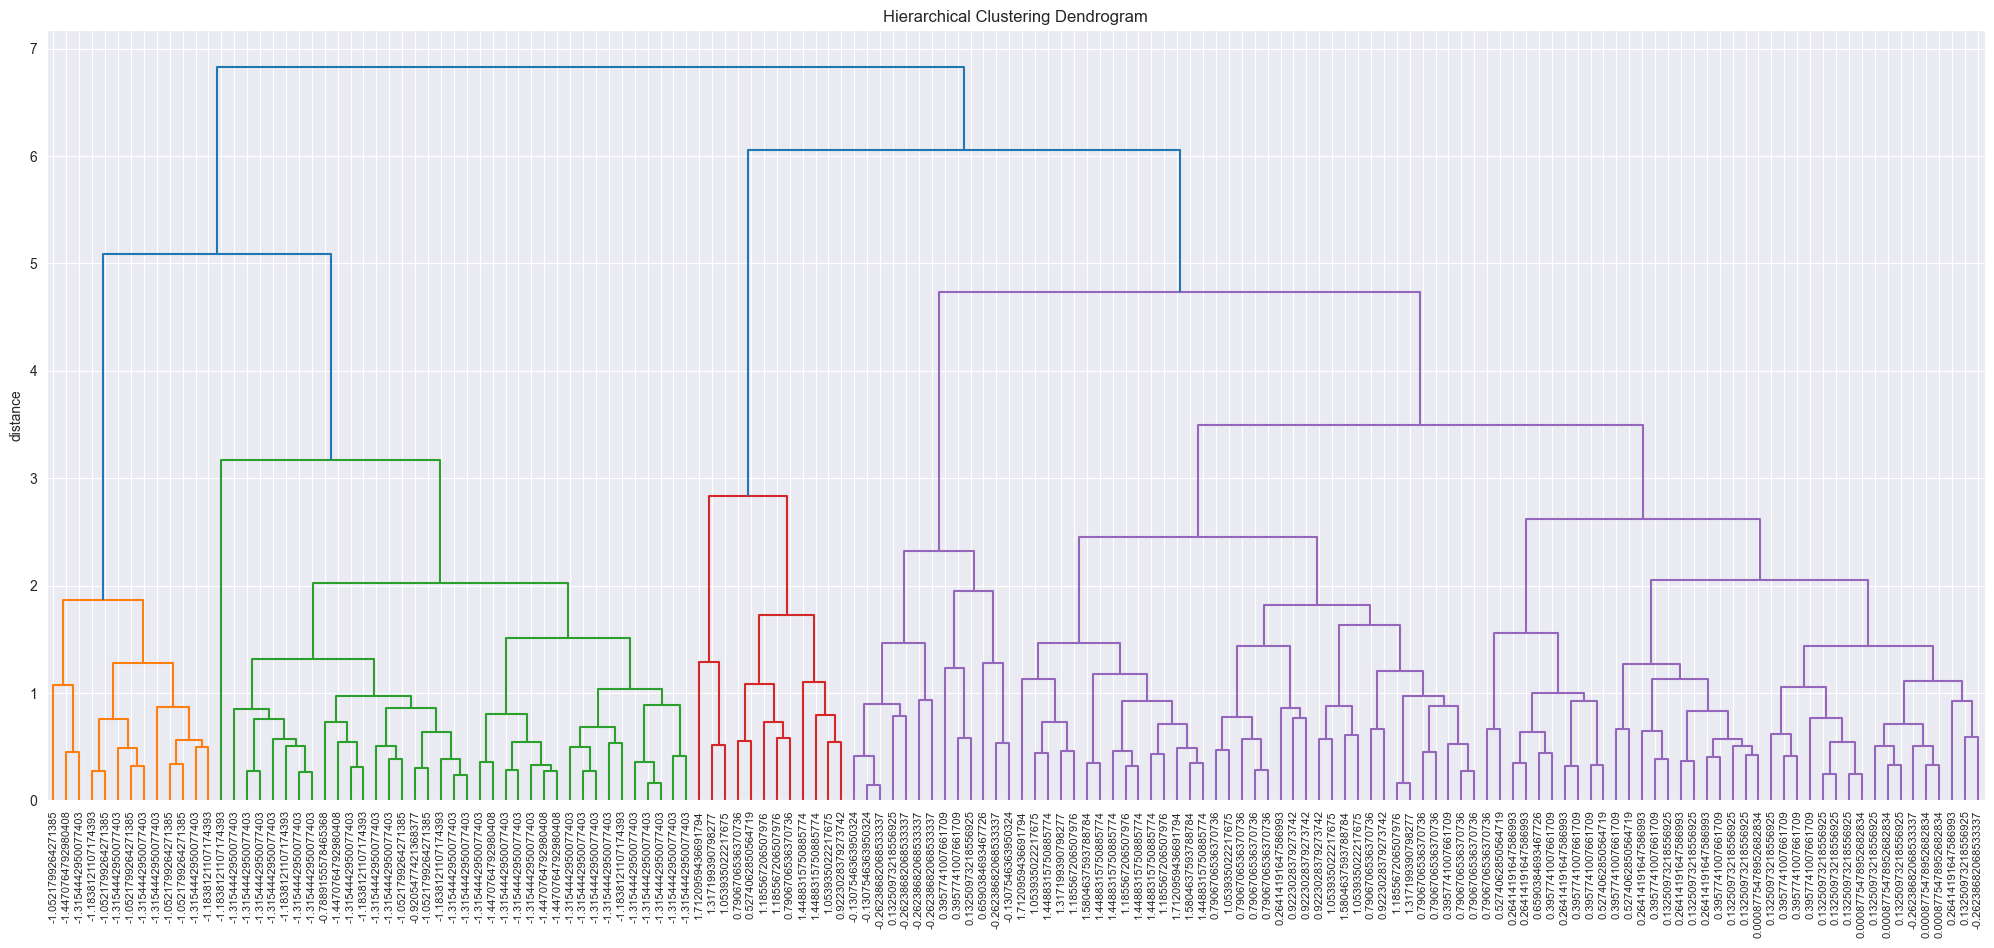

In [105]:
# plot the dendrogram
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

plt.figure(figsize=(25,10)) #Criei uma figura com tamanho de 25X10
dendrogram(
            h, #n  l matrix encoding the hierarchical clustering to render as a dendrogram.
            labels= np.array(df_S.iloc[:,4]),# select de labels, porque fizemos o iloc [:,4]
            leaf_rotation=90., #Specifies the angle in degrees to rotate the leaf labels.quandp nao, é based on the nr of nodes in the dendrogram ,default is 0.
            leaf_font_size=8, #Specifies the font size in points of the leaf label, quando não is the same like leaf_rotation
)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = { 'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
ax=plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    text = lbl.get_text()
    if text in label_colors:  # Só altera a cor se estiver no dicionário
        lbl.set_color(label_colors[text])

plt.show()

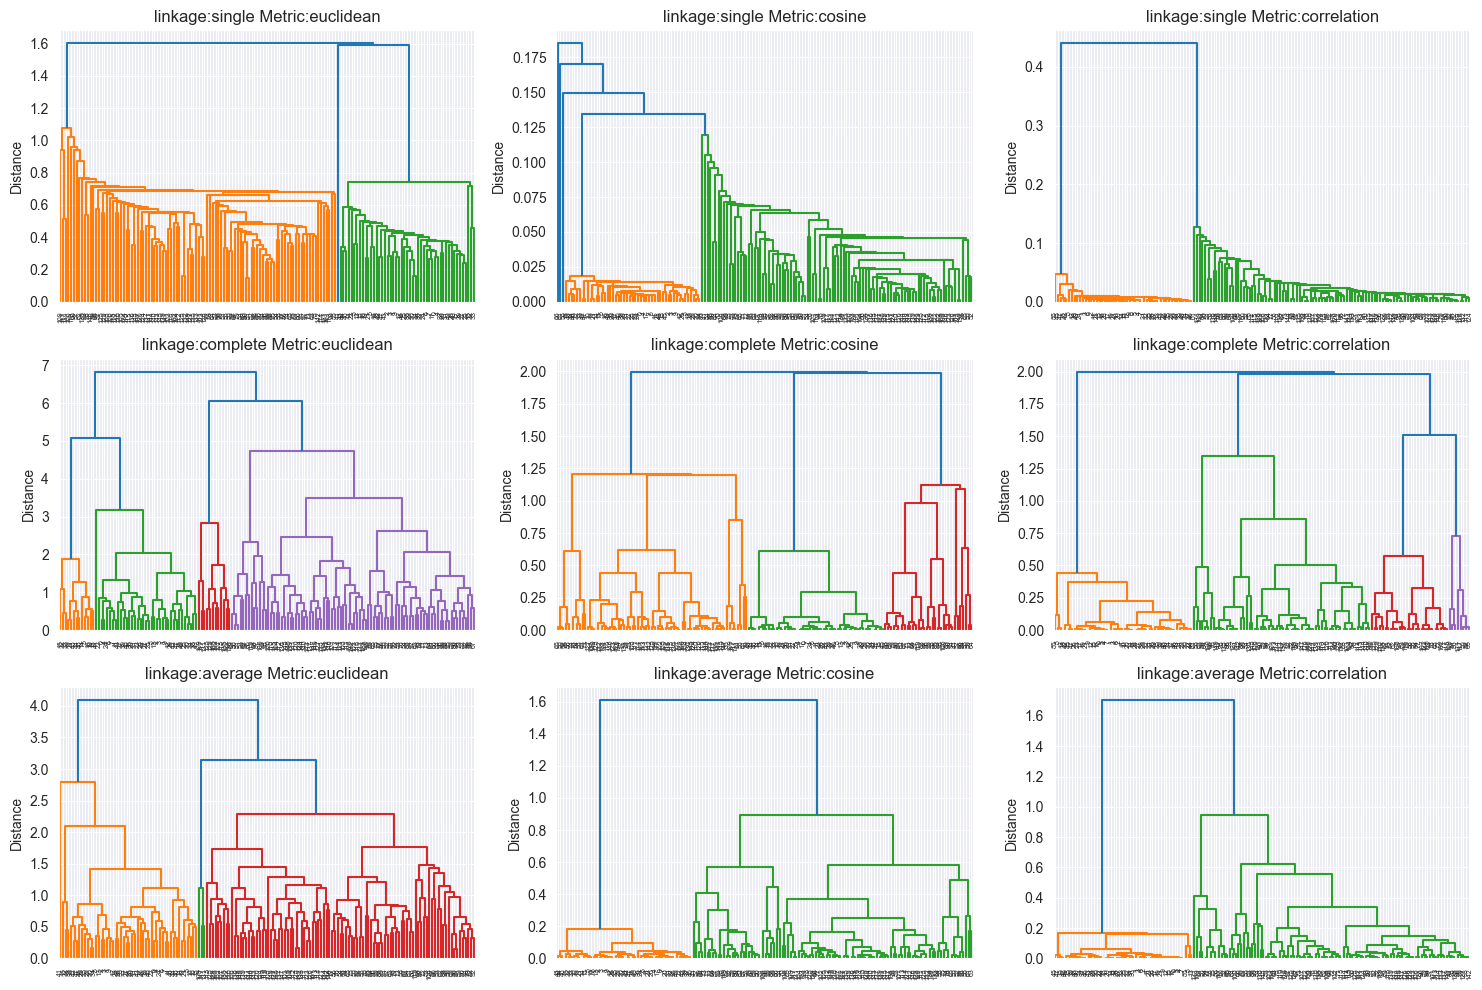

In [106]:
# test different linkage methods and metrics and compare the results

#linkage methods to test
linkage_methods = ['single','complete','average']
#metrics to test
metrics = ['euclidean', 'cosine', 'correlation']

#Create subplots
fig, axs = plt.subplots(len(linkage_methods),len(metrics), figsize=(15,10))

for i , method in enumerate(linkage_methods):
    for j, metric in enumerate(metrics):

    # Perform hierarchical clustering
        Z = linkage(df_S, method=method, metric=metric)

        # Plot dendrogram
        axs[i, j].set_title(f'linkage:{method} Metric:{metric}')
        dendrogram(Z, ax=axs[i, j])
        axs[i, j].set_ylabel('Distance')

plt.tight_layout()
plt.show()


In [107]:
# perform k-means clustering on the dataset
from sklearn.cluster import KMeans
k=3
kmeans_iris = KMeans(n_clusters = k, max_iter=1000, n_init=10)
#K é o nr de clusters q definimos
#max_iter é o
kmeans_iris.fit(iris_Standard)
labels =kmeans_iris.labels_ #Pegamos o rótulos dos clusters atribuídos pelo K-Means a cada ponto de dados
centroids =kmeans_iris.cluster_centers_ #Usamos o atributo cluster_centers_ para obter as coordenadas dos centroides de cada(3) cluster

pd.crosstab(labels, df_iris["Species"], rownames=['clusters'])#criamos uma tabelas de contigencia ou tabela cruzada

Species,setosa,versicolor,virginica
clusters,,,
0,0,2,45
1,50,0,0
2,0,48,5


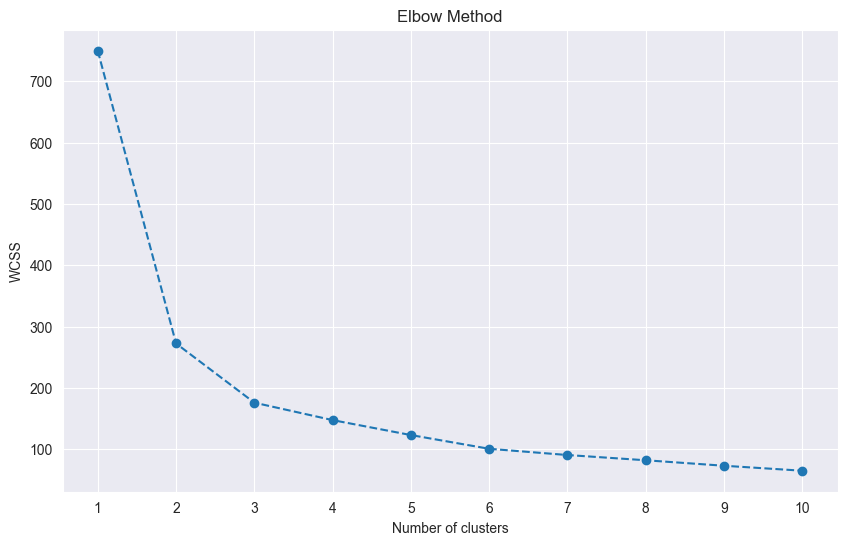

In [91]:
# use the elbow method to find the optimal number of clusters
#Calculating WCSS for different values of k, WCSS is the soma dos quadrados intra-clsuter que mede a compacidade dos clusters entao quanto menor o WCSS, mais compactos e bem agrupados estão os pontos dentro dos seus clusters.
wcss=[] #Lista dos wcss que guardará os valores de WCSS quando k varia de 0 à 10.
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=42)# com o k-means++os centróides são escolhidos de forma mais inteligente.
    kmeans.fit(df_S)
    wcss.append(kmeans.inertia_)#O atributo retorna o wcss do modelo treinado

# Plotting the elbow method graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss, marker='o',linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

